AIRLINES FLIGHT DELAY ANALYSIS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv("DelayedFlights.csv")

# 2. Basic info
print("Total records:", len(df))
print("\nMissing values per column:\n", df.isnull().sum())


Total records: 1936758

Missing values per column:
 Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64


In [5]:
# 3. Fill missing delay reason counts with zero (safe fallback)
delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay',
              'SecurityDelay', 'LateAircraftDelay']
for col in delay_cols:
    df[col] = df[col].fillna(0)

# 4. Percentage of each delay cause per record
df['total_delay'] = df[delay_cols].sum(axis=1)
for col in delay_cols:
    df[f'{col}_pct'] = df[col] / df['total_delay'] * 100
    df[f'{col}_pct'] = df[f'{col}_pct'].fillna(0)

In [7]:
# 5. Average delay percentages by month
avg_pct_by_month = df.groupby('Month')[[f'{col}_pct' for col in delay_cols]].mean()
print("\nAverage Delay % by Month:\n", avg_pct_by_month)


Average Delay % by Month:
        CarrierDelay_pct  WeatherDelay_pct  NASDelay_pct  SecurityDelay_pct  \
Month                                                                        
1             22.010186          2.877738     13.999772           0.209113   
2             21.015102          3.536432     14.823675           0.157495   
3             21.514930          2.840247     13.515276           0.218153   
4             21.480327          2.121760     14.073447           0.152137   
5             20.043803          2.098464     14.336488           0.165124   
6             20.376758          3.430931     17.186720           0.144853   
7             21.460115          3.456277     15.601211           0.172533   
8             21.750396          3.089025     13.112441           0.133528   
9             22.482643          2.258513     13.629479           0.126963   
10            20.393082          1.384771     12.204658           0.142567   
11            18.935250          1.8

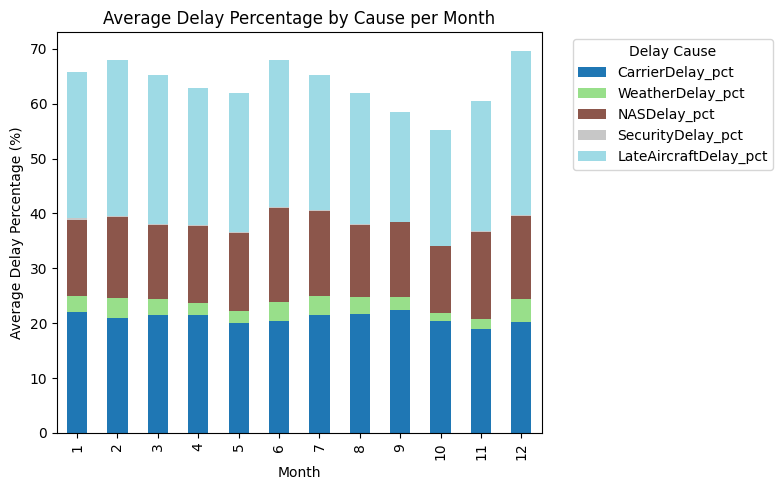

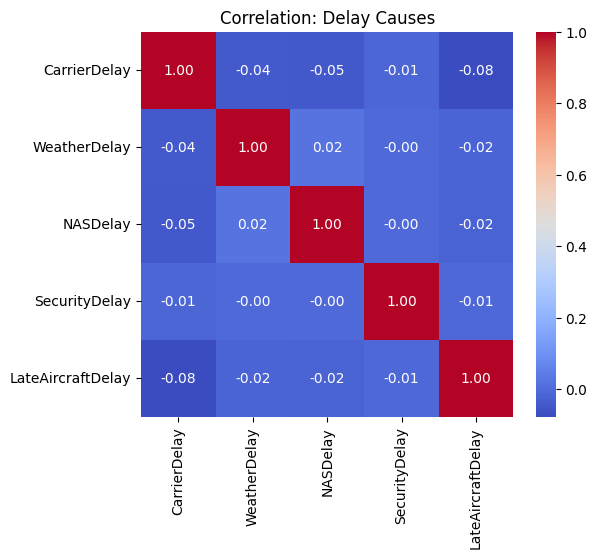

In [8]:
# 6. Bar chart — average delay percentage by month
avg_pct_by_month.plot(kind='bar', figsize=(8,5), stacked=True, colormap='tab20')
plt.title("Average Delay Percentage by Cause per Month")
plt.xlabel("Month")
plt.ylabel("Average Delay Percentage (%)")
plt.legend(title="Delay Cause", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 7. Correlation heatmap — delay causes relationship
plt.figure(figsize=(6,5))
sns.heatmap(df[delay_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation: Delay Causes")
plt.show()